<a href="https://colab.research.google.com/github/dauvannam321/ReadingList/blob/main/DenseNet/DenseNet_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.applications.densenet import DenseNet121
model = DenseNet121(weights='imagenet')


33188688/33188688 [==============================] - 2s 0us/step


##**Model architecture**

In [3]:
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

##**Classify on unseen image**

In [4]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

In [21]:
import requests

url = 'https://github.com/EliSchwartz/imagenet-sample-images/blob/master/n03637318_lampshade.JPEG?raw=true'
img_data = requests.get(url).content
with open('n03637318_lampshade.JPEG', 'wb') as handler:
    handler.write(img_data)

Input image shape: (1, 224, 224, 3)


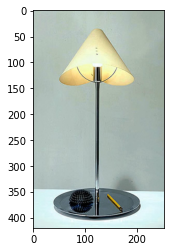

In [22]:
img_path = '/content/n03637318_lampshade.JPEG'

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [23]:
preds=model.predict(x)
# print("predicted class: ", preds )    # probabilities for being in each of the 1000 classes
decode_predictions(preds,top=3)  #  # probabilities for being in top of the 3 classes

1/1 [==============================] - 0s 26ms/step


[[('n06359193', 'web_site', 0.9999846),
  ('n03729826', 'matchstick', 1.46471075e-05),
  ('n03944341', 'pinwheel', 3.63738e-07)]]

`

Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 57ms/step


[[('n03637318', 'lampshade', 0.88220817),
  ('n04380533', 'table_lamp', 0.10860783),
  ('n03729826', 'matchstick', 0.004967838)]]

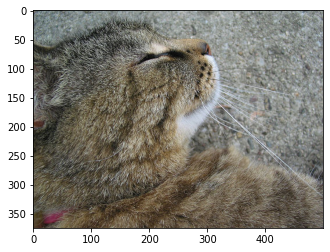

In [24]:
url = 'https://github.com/EliSchwartz/imagenet-sample-images/blob/master/n02123159_tiger_cat.JPEG?raw=true'
img_data = requests.get(url).content
with open('n02123159_tiger_cat.JPEG', 'wb') as handler:
    handler.write(img_data)

img_path = '/content/n02123159_tiger_cat.JPEG'

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

preds=model.predict(x)
# print("predicted class: ", preds )    # probabilities for being in each of the 1000 classes
decode_predictions(preds,top=3)  #  # probabilities for being in top of the 3 classes